# **Template Matching with Multiple Objects**

In [ ]:


import pandas as pd
import numpy as np
import tensorflow as tf
import librosa
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2


True

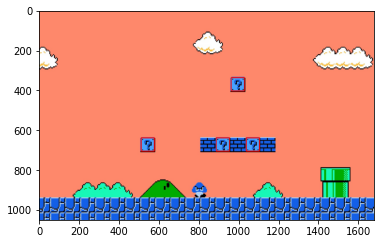

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('/content/wallhaven-nm9331.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/content/box.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,0), 2)    
plt.imshow(img_rgb)
cv2.imwrite('res.png',img_rgb)

In [ ]:
path = 'Emotion Detection/'
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

BATCH_SIZE = 32
IMG_SIZE = (48, 48)

In [ ]:

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    shear_range=0.2,
    validation_split=0.2
)
train_dataset = image_generator.flow_from_directory (
    train_dir,
    subset='training',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_dataset = image_generator.flow_from_directory (
    train_dir,
    subset='validation',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

In [ ]:

print(train_dataset.class_indices)

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.applications.ResNet152V2(
        weights="imagenet",
        include_top=False,
        input_tensor=tf.keras.layers.Input(
            shape=(48, 48, 3)
        )
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.layers[0].trainable = False

In [ ]:
# Convert image to grayscale
if(convert_image_to_grayscale):
  image_np[0] = np.tile(
    np.mean(image_np[0], 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

plt.figure(figsize=(24,32))
plt.imshow(image_np[0])
plt.show()

In [ ]:
image_generator = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=20,
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest',
                      shear_range=0.2,
                      validation_split=0.2,
                      )
train_image = image_generator.flow_from_directory( 
                                        train_dir,
                                        subset='training',
                                        target_size=(48,48),
                                        batch_size=64,
                                        class_mode='categorical'
                                        )
val_image = image_generator.flow_from_directory(
                                      img,
                                      subset='validation',
                                      target_size=(48,48),
                                      batch_size=32,
                                      class_mode='categorical'
                                      )

In [ ]:
train.class_indices

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_image.prefetch(buffer_size=AUTOTUNE)
validation_dataset = val_image.prefetch(buffer_size=AUTOTUNE)

In [ ]:
base_model.trainable = False

In [ ]:
model = Sequential(
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
model.compile(
    optimizer=tf.optimizers.RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

In [ ]:
model.fit()

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accutacy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
tf.saved_model.save(model, 'model')

# Object Detection

In [ ]:
# Creating prediction
boxes, scores, classes, num_detections = detector(rgb_tensor)

# Processing outputs
pred_labels = classes.numpy().astype('int')[0] 
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

# Putting the boxes and labels on the image
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
    if score < 0.5:
        continue

    score_txt = f'{100 * round(score)}%'
    img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),2)      
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
    cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)

In [ ]:
import tensorflow_hub as hub
import cv2
import numpy
import tensorflow as tf
import pandas as pd

# Carregar modelos
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")
labels = pd.read_csv('labels.csv',sep=';',index_col='ID')
labels = labels['OBJECT (2017 REL.)']

cap = cv2.VideoCapture(0)

width = 512
height = 512

while(True):
    #Capture frame-by-frame
    ret, frame = cap.read()
    
    #Resize to respect the input_shape
    inp = cv2.resize(frame, (width , height ))

    #Convert img to RGB
    rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

    #Is optional but i recommend (float convertion and convert img to tensor image)
    rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

    #Add dims to rgb_tensor
    rgb_tensor = tf.expand_dims(rgb_tensor , 0)
    
    boxes, scores, classes, num_detections = detector(rgb_tensor)
    
    pred_labels = classes.numpy().astype('int')[0]
    
    pred_labels = [labels[i] for i in pred_labels]
    pred_boxes = boxes.numpy()[0].astype('int')
    pred_scores = scores.numpy()[0]
   
   #loop throughout the detections and place a box around it  
    for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        score_txt = f'{100 * round(score,0)}'
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),1)      
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_boxes,label,(xmin, ymax-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)
        cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)



    #Display the resulting frame
    cv2.imshow('black and white',img_boxes)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
width = 160
height = 160
image = Null
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")
image = cv2.resize(image, (width , height ))
# need convert to grayscale
image_tensor = tf.convert_to_tensor(image, dtype=tf.uint8)
# Add dims to rgb_tensor
image_tensor = tf.expand_dims(image_tensor , 0)
boxes, scores, classes, num_detections = detector(rgb_tensor)
pred_labels = classes.numpy().astype('int')[0]
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

# Hand Detector

In [ ]:
import cv2
import mediapipe as mp
import time
 
cap = cv2.VideoCapture(1)
 
mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils
 
pTime = 0
cTime = 0
 
while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)
    # print(results.multi_hand_landmarks)
 
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            for id, lm in enumerate(handLms.landmark):
                # print(id, lm)
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                print(id, cx, cy)
                # if id == 4:
                cv2.circle(img, (cx, cy), 15, (255, 0, 255), cv2.FILLED)
 
            mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS)
 
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
 
    cv2.putText(img, str(int(fps)), (10, 70), cv2.FONT_HERSHEY_PLAIN, 3,
                (255, 0, 255), 3)
 
    cv2.imshow("Image", img)
    cv2.waitKey(1)

In [ ]:
import cv2
cap = cv2.VideoCapture(1)

In [ ]:
success, img = cap.read()

In [ ]:
success

False